# __Outlier handaling Algerian Forest Fire Dataset__

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r"../Algerian_forest_fires_dataset_UPDATE.csv",header=1)
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [ ]:
data[data.isna().any(axis=1)]
data.iloc[121:125,:]
data.drop([122,123],inplace=True)
data.reset_index(inplace=True)
data.drop(['index',"day","month","year"],axis=1,inplace=True)
data["region"] = None
data.iloc[:122,-1] = "Bejaia"
data.iloc[122:,-1] = "Abbes"
data

# __Data cleaning operations__

In [ ]:
data.info()

Getting unique values from y data column:  
Getting unique values from a column involves identifying and selecting only the distinct or unique values in that column.

In [ ]:
data["Classes  "].unique()

Apply `str.strip()` to clean the data:  
As we can see y data has some blank spaces so we need to remove then before use.  
I have used the `.strip()` method in Python to remove the leading and trailing spaces from the data in a column.

In [6]:
data["Classes  "] = data["Classes  "].str.strip()

In [ ]:
data["Classes  "].unique()

Convert data type of all data column:  
In below code I am selecting all data which are intiger and making the column data type as float64

In [ ]:
columns = data.columns[:-2]
for i in columns:
    data[i] = data[i].astype("float64")
data.info()

I am converting Rain from numerical to categorical data.  
Reason is While analysing the data I found that rain has 52-56% zero values.  
  
And from EDA for rain, we can see where is rain change for fire is very less, 

So I am changing this dataset from numerical to categorical data.  
  
I will put `rain` if rain > 0 else `not rain`

In [10]:
data["Rain "] = data["Rain "].apply(lambda x: 'not rain' if x == 0 else 'rain')

# __Outlier handaling__

<Axes: >

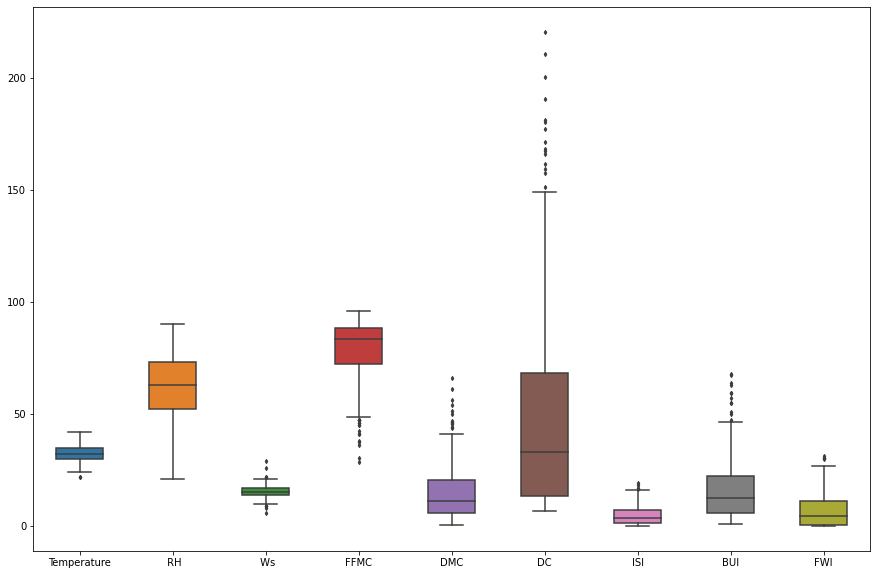

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [12]:
# mean is affected by outlier so i am using median for replasing outliers
floate_col = data.select_dtypes([np.number]).columns

In [13]:
for i in floate_col:
    print(i)
    print(data[i].max())
    print(data[i].min())
    print("=========================")


Temperature
42.0
22.0
 RH
90.0
21.0
 Ws
29.0
6.0
FFMC
96.0
28.6
DMC
65.9
0.7
DC
220.4
6.9
ISI
19.0
0.0
BUI
68.0
1.1
FWI
31.1
0.0


In [14]:
for i in floate_col:
    q3 = data[i].quantile(0.75)
    q1 = data[i].quantile(0.25)
    iqr = q3 - q1
    upper = q3 + (1.5 * iqr)
    lower = q1 - (1.5 * iqr)
    median = data[i].median()
    # data[i] = np.where(data[i]>upper,median,data[i])
    # data[i] = np.where(data[i]<lower,median,data[i])
    data[i] = data[i].apply(lambda x: median if (x < lower) | (x > upper) else x)

In [15]:
for i in floate_col:
    print(i)
    print(data[i].max())
    print(data[i].min())
    print("=========================")


Temperature
42.0
24.0
 RH
90.0
21.0
 Ws
21.0
10.0
FFMC
96.0
48.6
DMC
41.1
0.7
DC
149.2
6.9
ISI
16.0
0.0
BUI
46.5
1.1
FWI
26.9
0.0


<Axes: >

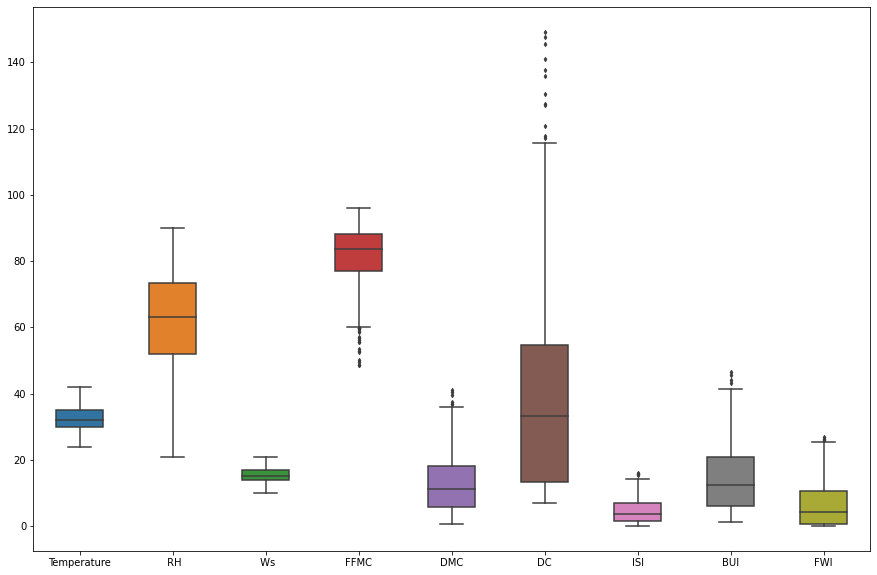

In [16]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)